In [371]:
from pathlib import Path

from sklearn import preprocessing
from sklearn.neighbors import NearestNeighbors, KNeighborsClassifier
import matplotlib.pylab as plt

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
import statsmodels.api as sm
import seaborn as sns
from dmba import gainsChart, liftChart, plotDecisionTree, classificationSummary, regressionSummary
from dmba.metric import AIC_score

%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
import dmba
import pydotplus
import graphviz

from pathlib import Path

from sklearn.metrics import pairwise
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import KMeans


from pandas.plotting import parallel_coordinates

from sklearn.metrics import (
    confusion_matrix,
    accuracy_score,
    recall_score,
    f1_score,
    precision_score)

import dmba
import warnings
warnings.filterwarnings("ignore")


In [372]:
#importing Dataset 
d_df = pd.read_csv('diabetes.csv')

# 1. Understanding Dataset

In [373]:
d_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [374]:
#describing the data 
np.round(d_df.describe(), decimals=2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00,768.00
mean,3.85,120.89,69.11,20.54,79.80,31.99,0.47,33.24,0.35
std,3.37,31.97,19.36,15.95,115.24,7.88,0.33,11.76,0.48
min,0.00,0.00,0.00,0.00,0.00,0.00,0.08,21.00,0.00
25%,1.00,99.00,62.00,0.00,0.00,27.30,0.24,24.00,0.00
50%,3.00,117.00,72.00,23.00,30.50,32.00,0.37,29.00,0.00
75%,6.00,140.25,80.00,32.00,127.25,36.60,0.63,41.00,1.00
max,17.00,199.00,122.00,99.00,846.00,67.10,2.42,81.00,1.00


In [375]:
d_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [376]:
d_df.duplicated().sum()

0

# 2. Data Visualization 

## Part 1

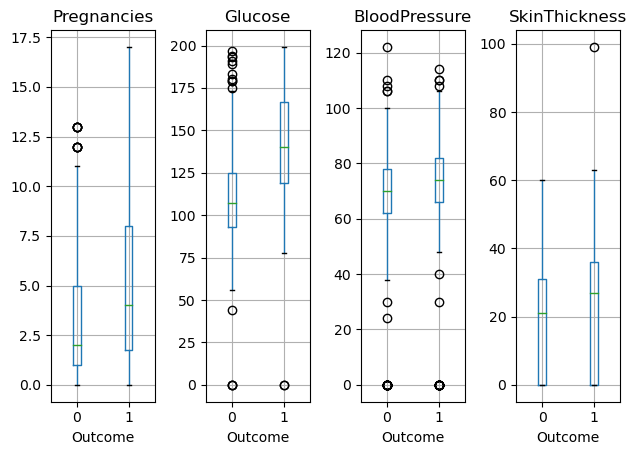

In [377]:
# identify outliers 
fig, axes = plt.subplots(nrows=1, ncols=4) #subplot divides a plot into subplots
d_df.boxplot(column='Pregnancies', by='Outcome', ax=axes[0])
d_df.boxplot(column='Glucose', by='Outcome', ax=axes[1])
d_df.boxplot(column='BloodPressure', by='Outcome', ax=axes[2])
d_df.boxplot(column='SkinThickness', by='Outcome', ax=axes[3])

for ax in axes:
    ax.set_xlabel('Outcome')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

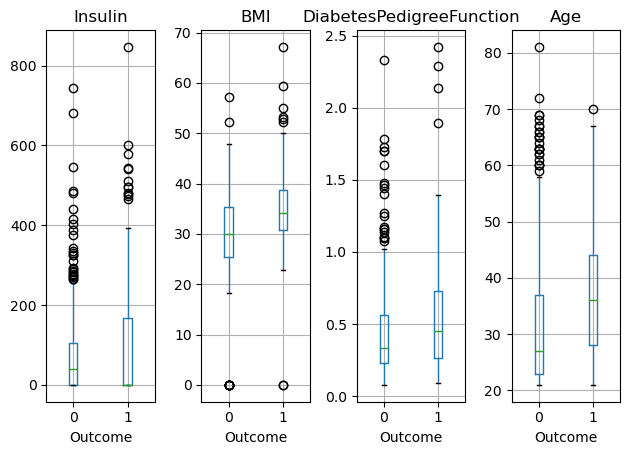

In [378]:
fig, axes = plt.subplots(nrows=1, ncols=4) #subplot divides a plot into subplots
d_df.boxplot(column='Insulin', by='Outcome', ax=axes[0])
d_df.boxplot(column='BMI', by='Outcome', ax=axes[1])
d_df.boxplot(column='DiabetesPedigreeFunction', by='Outcome', ax=axes[2])
d_df.boxplot(column='Age', by='Outcome', ax=axes[3])

for ax in axes:
    ax.set_xlabel('Outcome')
plt.suptitle('')  # Suppress the overall title
plt.tight_layout()  # Increase the separation between the plots

plt.show()

# 3. Data Cleaning

In [379]:
# columns such as Glucose, BloodPressure, SkinThickness, Insulin, Age, BMI cannot have 0 values. So replacing all the 0 with null values

diabetes_df = d_df
diabetes_df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]] = diabetes_df[["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI", "Age"]].replace(0, np.NaN)

In [380]:
diabetes_df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [381]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer

# "Cleaning" the data -- replacing/imputing missing data

# Approach:
# If a categorical feature is missing: add new category 'missing_value' 
# For Numerical features: replacing with 0 (or median, mean, or most frequent value, etc.) An alternative approach is to imputate, see here: https://scikit-learn.org/stable/modules/impute.html 

# fixing numericals 
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
# we selected mean, since mean gives us a comparatively higher accuracy in the validation data in a few models and exactly the same as median in some other models 
imputer.fit(diabetes_df.select_dtypes(include=['int64','float64']))
diabetes_df[diabetes_df.select_dtypes(include=['int64','float64']).columns] = imputer.transform(diabetes_df.select_dtypes(include=['int64','float64']))


In [382]:
#Checking for null values in the final imputed dataframe
diabetes_df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [383]:
# Describing the dataset
diabetes_df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,121.687,72.405,29.153,155.548,32.457,0.472,33.241,0.349
std,3.370,30.436,12.096,8.791,85.021,6.875,0.331,11.760,0.477
min,0.000,44.000,24.000,7.000,14.000,18.200,0.078,21.000,0.000
25%,1.000,99.750,64.000,25.000,121.500,27.500,0.244,24.000,0.000
50%,3.000,117.000,72.203,29.153,155.548,32.400,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,155.548,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


# 2. Data Visualization 

## Part 2

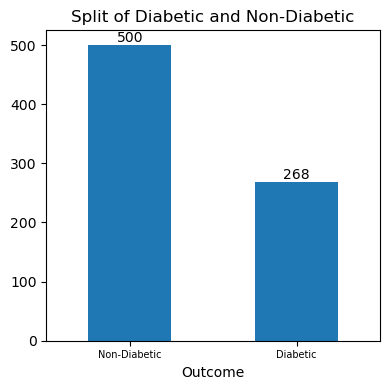

In [384]:
## plotting graph with number of diabetes and non-diabetes patients records
dataForPlot = diabetes_df.groupby('Outcome').size()
ax = dataForPlot.plot(kind='bar', figsize=[4, 4])
plt.xticks([0, 1], ['Non-Diabetic', 'Diabetic'], rotation = 0, size = 7)
plt.title("Split of Diabetic and Non-Diabetic")
ax.bar_label(ax.containers[0], label_type='edge')

plt.tight_layout()
plt.show()

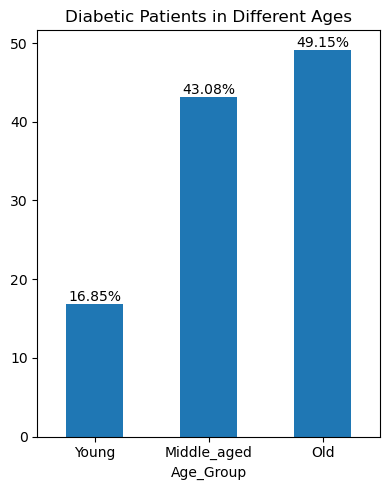

In [385]:
#finding & ploting graph of different age group suffering from diabetes
diab_df = diabetes_df.copy()
diab_df["Age_Group"] = pd.cut(x=diabetes_df['Age'], bins=[0,25,45,100], labels=["Young","Middle_aged","Old"])
dataForPlot = diab_df.groupby('Age_Group').mean()['Outcome']*100
ax = dataForPlot.plot(kind='bar', figsize=[4, 5])
plt.title("Diabetic Patients in Different Ages")
plt.xticks(rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f%%')

plt.tight_layout()
plt.show()

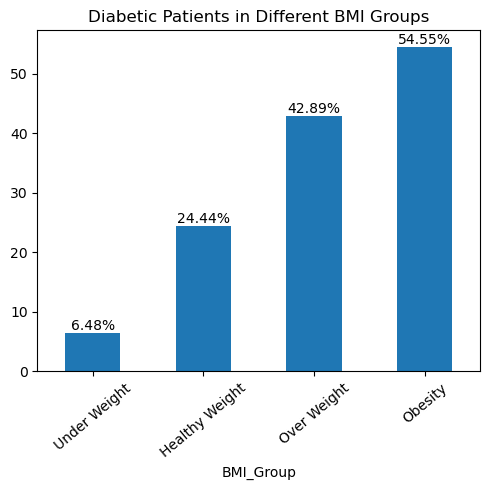

In [386]:
#finding & ploting graph of peoples BMI suffering from diabetic
diab_df["BMI_Group"] = pd.cut(x=diab_df['BMI'], bins=[19,25,30,40, 50], labels=["Under Weight","Healthy Weight","Over Weight", "Obesity"])
dataForPlot = label = diab_df.groupby('BMI_Group').mean()['Outcome']*100
ax = dataForPlot.plot(kind='bar', figsize=[5, 5])
plt.title("Diabetic Patients in Different BMI Groups")
plt.xticks(rotation = 40)
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f%%', rotation = 0)

plt.tight_layout()
plt.show()

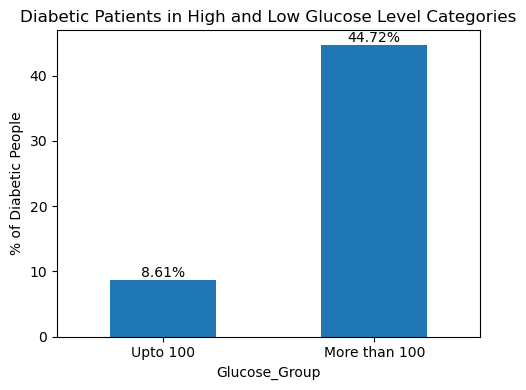

In [387]:
#finding and plotting graph of diabetic patinets with different glucose levels
diab_df['Glucose_Group'] = diab_df['Glucose'].apply(lambda x: 1 if x > 100 else 0)
dataForPlot = diab_df.groupby('Glucose_Group').mean()['Outcome'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 4])
ax.set_ylabel('% of Diabetic People')
ax.set_xticklabels(['Upto 100', 'More than 100'], rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f%%', rotation = 0)
plt.title("Diabetic Patients in High and Low Glucose Level Categories")

plt.tight_layout()
plt.show()

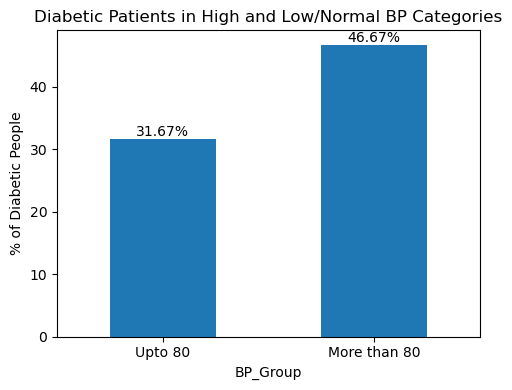

In [388]:
#finding and plotting graph of diabetic patinets with different glucose levels
diab_df['BP_Group'] = diab_df['BloodPressure'].apply(lambda x: 1 if x > 80 else 0)
dataForPlot = diab_df.groupby('BP_Group').mean()['Outcome'] * 100
ax = dataForPlot.plot(kind='bar', figsize=[5, 4])
ax.set_ylabel('% of Diabetic People')
ax.set_xticklabels(['Upto 80', 'More than 80'], rotation = 0)
ax.bar_label(ax.containers[0], label_type='edge', fmt='%.2f%%', rotation = 0)
plt.title("Diabetic Patients in High and Low/Normal BP Categories")

plt.tight_layout()
plt.show()

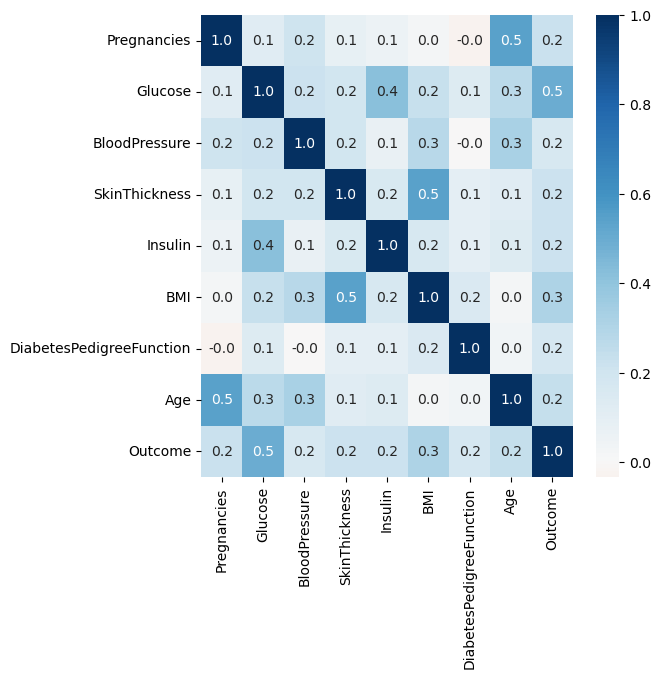

In [389]:
import seaborn as sns
# Plotting heatmap to check if the variables have any relationship with each other
corr = diabetes_df.corr()
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(corr, annot=True, fmt=".1f", cmap="RdBu", center=0, ax=ax)

plt.show()

In [390]:
# Since there is no specific relation between each of these variables, there is no multicollinearity issue and hence
# we would consider all of the variables as predictors

# 4. kNN Model

In [391]:
predictors = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
outcome = ['Outcome']

In [392]:
#Partition the data into train and valid. Make sure you set seed
trainData, validData = train_test_split(diabetes_df, test_size=0.20, random_state=0)
print('Training   : ', trainData.shape)
print('Validation : ', validData.shape)

Training   :  (614, 9)
Validation :  (154, 9)


In [393]:
#Scaling Data
scaler = preprocessing.StandardScaler()
scaler.fit(trainData[predictors])  

# Transform the full dataset
dfNorm = pd.concat([pd.DataFrame(scaler.transform(diabetes_df[predictors]), 
                                    columns=predictors),
                       diabetes_df[outcome]], axis=1)

In [394]:
dfNorm

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.618,0.870,-0.054,0.649,-0.012,0.139,0.482,1.366,1.0
1,-0.835,-1.213,-0.554,-0.030,-0.012,-0.863,-0.347,-0.216,0.0
2,1.199,2.028,-0.720,-0.013,-0.012,-1.335,0.617,-0.133,1.0
3,-0.835,-1.081,-0.554,-0.709,-0.719,-0.648,-0.899,-1.049,0.0
4,-1.126,0.506,-2.720,0.649,0.131,1.498,5.471,-0.050,1.0
...,...,...,...,...,...,...,...,...,...
763,1.780,-0.684,0.279,2.120,0.268,0.039,-0.887,2.449,0.0
764,-0.545,0.010,-0.220,-0.256,-0.012,0.597,-0.380,-0.549,0.0
765,0.327,-0.023,-0.054,-0.709,-0.512,-0.920,-0.665,-0.299,0.0
766,-0.835,0.143,-1.054,-0.013,-0.012,-0.362,-0.353,1.117,1.0


In [395]:
trainNorm = dfNorm.iloc[trainData.index]
print(trainNorm.shape)
#Similarly, get the valid one as well
validNorm = dfNorm.iloc[validData.index]
print(validNorm.shape)

(614, 9)
(154, 9)


In [396]:
dfNorm.shape

(768, 9)

In [397]:
train_X = trainNorm[predictors]
train_y = trainNorm[outcome]
valid_X = validNorm[predictors]
valid_y = validNorm[outcome]

# Train a classifier for different values of k
results = []
for k in range(1, 60):
    knn = KNeighborsClassifier(n_neighbors=k).fit(train_X, train_y)
    results.append({
        'k': k,
        'accuracy': round(accuracy_score(valid_y, knn.predict(valid_X)),4)
    })

# Convert results to a pandas data frame
results = pd.DataFrame(results)
print(results)

     k  accuracy
0    1     0.753
1    2     0.740
2    3     0.786
3    4     0.786
4    5     0.766
5    6     0.786
6    7     0.799
7    8     0.812
8    9     0.805
9   10     0.812
10  11     0.812
11  12     0.799
12  13     0.818
13  14     0.812
14  15     0.818
15  16     0.792
16  17     0.792
17  18     0.805
18  19     0.779
19  20     0.786
20  21     0.779
21  22     0.786
22  23     0.792
23  24     0.786
24  25     0.792
25  26     0.773
26  27     0.818
27  28     0.799
28  29     0.792
29  30     0.792
30  31     0.799
31  32     0.825
32  33     0.805
33  34     0.805
34  35     0.799
35  36     0.799
36  37     0.799
37  38     0.792
38  39     0.799
39  40     0.786
40  41     0.799
41  42     0.792
42  43     0.799
43  44     0.792
44  45     0.792
45  46     0.799
46  47     0.792
47  48     0.799
48  49     0.779
49  50     0.805
50  51     0.792
51  52     0.799
52  53     0.786
53  54     0.792
54  55     0.786
55  56     0.786
56  57     0.786
57  58     0.7

In [398]:
# k=32, we get 82.47%. But since k is even, we consider other value. So k = 13.

In [399]:
knn=KNeighborsClassifier(n_neighbors = 13).fit(train_X,train_y)

In [400]:
print(classificationSummary(valid_y, knn.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, knn.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, knn.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, knn.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, knn.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.8182)

       Prediction
Actual  0  1
     0 95 12
     1 16 31
None
Accuracy Score: 81.82%
Precision Score: 72.09%
Recall Score: 65.96%
f1 Score: 68.89%


In [401]:
# At k=13, kNN clasifier accuracy = 81.82%

# 5. Decision Trees

In [309]:
#Partition
X = diabetes_df[predictors]
y = diabetes_df[outcome]
train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.2, random_state=1)

## Descision Tree with Max Depth = 2 

In [310]:
#Develop a tree with max_depth = 2 and obtaining classification Summary
classTree1 = DecisionTreeClassifier(random_state=0, max_depth=2)
classTree1.fit(train_X, train_y)
# Identify and display number of nodes in the tree.
tree_nodes = classTree1.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 7


In [311]:
print(classificationSummary(valid_y, classTree1.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, classTree1.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, classTree1.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, classTree1.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, classTree1.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.7922)

       Prediction
Actual  0  1
     0 88 11
     1 21 34
None
Accuracy Score: 79.22%
Precision Score: 75.56%
Recall Score: 61.82%
f1 Score: 68.0%


In [284]:
## The accuracy for decision tree with max_depth = 2 is 79.22%

## Decision Tree with minimum impurity = 0.01

In [286]:
classTree2 = DecisionTreeClassifier(random_state=1, ccp_alpha=0.01)
classTree2.fit(train_X, train_y)
# Identify and display number of nodes in the tree.
tree_nodes = classTree2.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 13


In [287]:
print(classificationSummary(valid_y, classTree2.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, classTree2.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, classTree2.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, classTree2.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, classTree2.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.8182)

       Prediction
Actual  0  1
     0 87 12
     1 16 39
None
Accuracy Score: 81.82%
Precision Score: 76.47%
Recall Score: 70.91%
f1 Score: 73.58%


In [288]:
## The accuracy for decision tree with ccp_alpha = 0.01 is 81.82%

## Decision Tree with user defined parameters

Small Classification Tree with Control Parameters


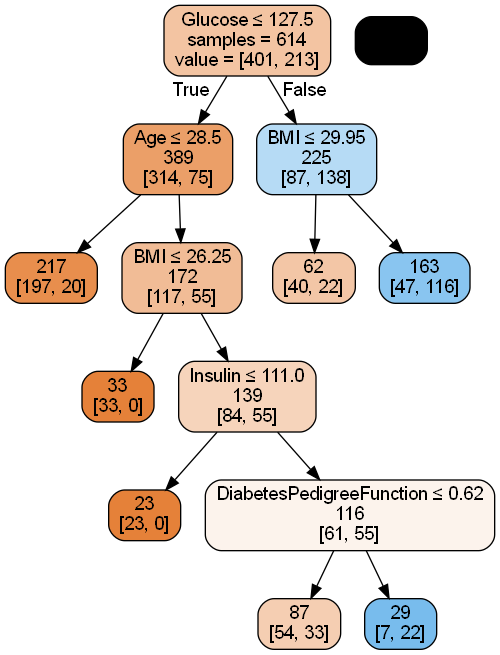

In [312]:
# Create a smaller classification tree for training partition using DecisionTreeClassifier() function control parameters:
#  - Maximum Tree depth (number of splits) = 8;
#  - Minimum impurity decrease per split = 0.01 
#  - Minimum number of sample records in a node for splitting = 30.   
smallClassTree = DecisionTreeClassifier(max_depth=8, 
        min_impurity_decrease=0.01, min_samples_split=30)
smallClassTree.fit(train_X, train_y)

# Display classification tree for training partition.
print('Small Classification Tree with Control Parameters')
plotDecisionTree(smallClassTree, feature_names=train_X.columns)

In [313]:
# Identify and display number of nodes in the tree.
tree_nodes = smallClassTree.tree_.node_count
print('Number of nodes:', tree_nodes)

Number of nodes: 13


                    feature  importance
1                   Glucose    0.530521
5                       BMI    0.208216
7                       Age    0.104600
4                   Insulin    0.090808
6  DiabetesPedigreeFunction    0.065855
0               Pregnancies    0.000000
2             BloodPressure    0.000000
3             SkinThickness    0.000000


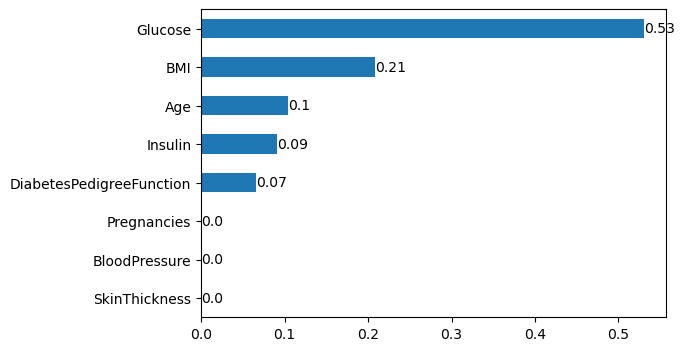

In [314]:
importances = smallClassTree.feature_importances_

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
df = df.sort_values('importance', ascending = False)
print(df.head(50))

ax = df.plot(kind='barh', x='feature', legend=False, figsize=(6,4))
ax.set_ylabel('')

for i, v in enumerate(df['importance']):
    ax.text(v, i + 0.1, str(round(v, 2)) )

plt.gca().invert_yaxis()
#plt.tight_layout()
plt.show()

In [293]:
print(classificationSummary(valid_y, smallClassTree.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, smallClassTree.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, smallClassTree.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, smallClassTree.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, smallClassTree.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.8182)

       Prediction
Actual  0  1
     0 87 12
     1 16 39
None
Accuracy Score: 81.82%
Precision Score: 76.47%
Recall Score: 70.91%
f1 Score: 73.58%


## Grid Search

In [315]:
# Start with an initial guess for parameters
param_grid = {
    'max_depth': [5, 10, 20, 30, 40], 
    'min_samples_split': [20, 40, 60, 80, 100], 
    'min_impurity_decrease': [0, 0.0005, 0.001, 0.005, 0.01, 0.05], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1) #n_jobs=-1 means 
        #that the availalbe computer memory (CPU) will be used to make calculations faster. 
gridSearch.fit(train_X, train_y)
print('Initial score: ', round(gridSearch.best_score_,4))
print('Initial parameters: ', gridSearch.best_params_)

Initial score:  0.7557
Initial parameters:  {'max_depth': 10, 'min_impurity_decrease': 0.0005, 'min_samples_split': 80}


In [316]:
# Adapt grid based on result from initial grid search
param_grid = {
    'max_depth': list(range(10,30)), 
    'min_samples_split': list(range(60, 120)), 
    'min_impurity_decrease': [0, 0.0009, 0.001, 0.005, 0.008, 0.01], 
}
gridSearch = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5, n_jobs=-1)
gridSearch.fit(train_X, train_y)
print('Improved score: ', round(gridSearch.best_score_,4))
print('Improved parameters: ', gridSearch.best_params_)

bestClassTree = gridSearch.best_estimator_

Improved score:  0.7638
Improved parameters:  {'max_depth': 10, 'min_impurity_decrease': 0, 'min_samples_split': 76}


In [317]:
print(classificationSummary(valid_y, bestClassTree.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, bestClassTree.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, bestClassTree.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, bestClassTree.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, bestClassTree.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.7987)

       Prediction
Actual  0  1
     0 83 16
     1 15 40
None
Accuracy Score: 79.87%
Precision Score: 71.43%
Recall Score: 72.73%
f1 Score: 72.07%


In [318]:
# The accuracy of the best decision tree on validation data is 79.87%

# 6. Random Forest

In [319]:
rf = RandomForestClassifier(n_estimators=500, random_state=42)
rf.fit(train_X, train_y)

RandomForestClassifier(n_estimators=500, random_state=42)

                    feature  importance
1                   Glucose    0.250873
5                       BMI    0.164343
6  DiabetesPedigreeFunction    0.126694
7                       Age    0.122962
4                   Insulin    0.095268
2             BloodPressure    0.083570
0               Pregnancies    0.081105
3             SkinThickness    0.075185


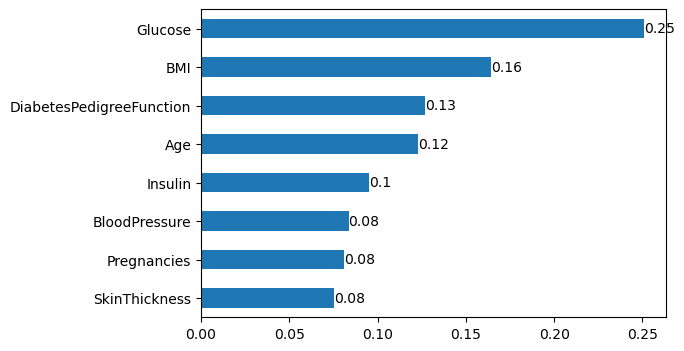

In [320]:
importances = rf.feature_importances_

df = pd.DataFrame({'feature': train_X.columns, 'importance': importances})
df = df.sort_values('importance', ascending = False)
print(df.head(50))

ax = df.plot(kind='barh', x='feature', legend=False, figsize=(6,4))
ax.set_ylabel('')

for i, v in enumerate(df['importance']):
    ax.text(v, i + 0.1, str(round(v, 2)) )

plt.gca().invert_yaxis()
#plt.tight_layout()
plt.show()

In [321]:
print(classificationSummary(valid_y, rf.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, rf.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, rf.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, rf.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, rf.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.8052)

       Prediction
Actual  0  1
     0 89 10
     1 20 35
None
Accuracy Score: 80.52%
Precision Score: 77.78%
Recall Score: 63.64%
f1 Score: 70.0%


In [322]:
## Random forest provides the importance of the variables and the accuracy on validation data obtained 
# by using Random Forest Classifier is 80.52%

# 7.Boosted Trees

In [323]:
boost = GradientBoostingClassifier()
boost.fit(train_X, train_y)

GradientBoostingClassifier()

In [328]:
print(classificationSummary(valid_y, boost.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, boost.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, boost.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, boost.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, boost.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.7922)

       Prediction
Actual  0  1
     0 86 13
     1 19 36
None
Accuracy Score: 79.22%
Precision Score: 73.47%
Recall Score: 65.45%
f1 Score: 69.23%


In [326]:
# the accuracy on validation data obtained by using Boosted Trees Classifier is 79.22%

# 8. Logistic Regression

In [329]:
logit_reg = sm.GLM(y, X, family=sm.families.Binomial())
logit_reg.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                Outcome   No. Observations:                  768
Model:                            GLM   Df Residuals:                      760
Model Family:                Binomial   Df Model:                            7
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -443.45
Date:                Fri, 12 May 2023   Deviance:                       886.91
Time:                        15:04:23   Pearson chi2:                     788.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1296
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------
Pregnancies                  0.1338      0.029      4.561      0.000       0.076       0.191
Glucose                      0.0225      0.003      7.030      0.000       0.016       0.029
BloodPressure               -0.0595      0.007     -8.493      0.000      -0.073      -0.046
SkinThickness               -0.0075      0.011     -0.676      0.499      -0.029       0.014
Insulin                     -0.0003      0.001     -0.320      0.749      -0.002       0.002
BMI                          0.0195      0.015      1.336      0.181      -0.009       0.048
DiabetesPedigreeFunction     0.3733      0.249      1.497      0.134      -0.115       0.862
Age                         -0.0023      0.009     -0.264      0.792      -0.020       0.015
============================================================================================
"""

In [330]:
logit_reg = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
logit_reg.fit(train_X, train_y)

#Get intercepts, coefficients, and AIC
print('intercept ', round(logit_reg.intercept_[0],2))
print(pd.DataFrame({'coeff': logit_reg.coef_[0]}, index=X.columns).transpose().round(4))
print() #Creates a Line space
print('AIC', round(AIC_score(valid_y, logit_reg.predict(valid_X), df = len(train_X.columns) + 1),2))

intercept  -8.61
       Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin     BMI  \
coeff       0.1217   0.0358        -0.0118         0.0003  -0.0006  0.0956   

       DiabetesPedigreeFunction     Age  
coeff                    0.6607  0.0138  

AIC 1104.56


In [331]:
logit_reg_pred = logit_reg.predict(valid_X)
logit_reg_proba = logit_reg.predict_proba(valid_X)
logit_result = pd.DataFrame({'actual': valid_y.values.flatten(), 
                             'p(0)': [round(p[0],4) for p in logit_reg_proba],
                             'p(1)': [round(p[1],4) for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
#valid_y.values.flatten() if one-dimensional error appears


# display different cases
interestingCases = [50, 95, 134]
print(logit_result.loc[interestingCases])

     actual    p(0)    p(1)  predicted
50      0.0  0.9600  0.0400        0.0
95      0.0  0.5434  0.4566        0.0
134     0.0  0.8651  0.1349        0.0


In [333]:
#Use the classification summary function for validation data
logit_reg_pred = logit_reg.predict(valid_X)

In [335]:
print(classificationSummary(valid_y, logit_reg.predict(valid_X)))
print("Accuracy Score:", str(round(accuracy_score(valid_y, logit_reg.predict(valid_X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, logit_reg.predict(valid_X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, logit_reg.predict(valid_X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, logit_reg.predict(valid_X))*100,2))+"%")

Confusion Matrix (Accuracy 0.7727)

       Prediction
Actual  0  1
     0 88 11
     1 24 31
None
Accuracy Score: 77.27%
Precision Score: 73.81%
Recall Score: 56.36%
f1 Score: 63.92%


In [240]:
# Accuracy on validation data obtained by Logistic Regression is 77.27%

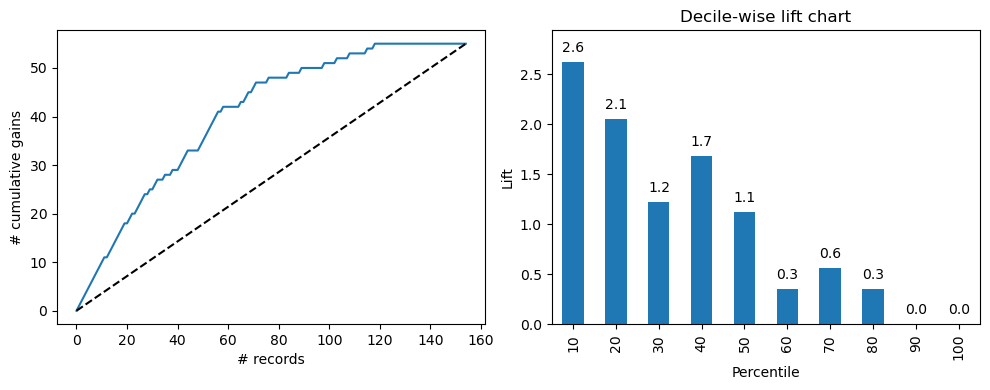

In [336]:
df = logit_result.sort_values(by=['p(1)'], ascending=False)
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

gainsChart(df.actual, ax=axes[0])
liftChart(df.actual, title='Decile-wise lift chart', ax=axes[1])
    
plt.tight_layout()
plt.show()

## Logistic Regression with cut off = 0.4

In [338]:
#Use a different cutoff and obtain a classification summary
newpred_y= logit_reg_proba[:,1]> 0.4

In [345]:
print(classificationSummary(valid_y, newpred_y))
print("Accuracy Score:", str(round(accuracy_score(valid_y, newpred_y)*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, newpred_y)*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, newpred_y)*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, newpred_y)*100,2))+"%")

Confusion Matrix (Accuracy 0.8052)

       Prediction
Actual  0  1
     0 84 15
     1 15 40
None
Accuracy Score: 80.52%
Precision Score: 72.73%
Recall Score: 72.73%
f1 Score: 72.73%


In [340]:
# Accuracy for Logistic Regression with k = 0.4 is 80.52%

## Backward Elimination Model for Logistic Regression

In [341]:
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
def train_model(variables):
    model = LogisticRegression(penalty="l2", C=1e42, solver='liblinear')
    model.fit(train_X, train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X), model)

bestBE_model, best_variables = backward_elimination(train_X.columns, train_model, score_model, verbose=True)

print(best_variables)

Variables: Pregnancies, Glucose, BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction, Age
Start: score=5173.11
Step: score=5173.11, remove None
['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']


In [344]:
print(classificationSummary(valid_y, bestBE_model.predict(valid_X[best_variables])))
print("Accuracy Score:", str(round(accuracy_score(valid_y, bestBE_model.predict(valid_X[best_variables]))*100,2))+"%")
print("Precision Score:",str(round(precision_score(valid_y, bestBE_model.predict(valid_X[best_variables]))*100,2))+"%")
print("Recall Score:",str(round(recall_score(valid_y, bestBE_model.predict(valid_X[best_variables]))*100,2))+"%")
print("f1 Score:",str(round(f1_score(valid_y, bestBE_model.predict(valid_X[best_variables]))*100,2))+"%")

Confusion Matrix (Accuracy 0.7727)

       Prediction
Actual  0  1
     0 88 11
     1 24 31
None
Accuracy Score: 77.27%
Precision Score: 73.81%
Recall Score: 56.36%
f1 Score: 63.92%


In [346]:
## By using a different cutoff, the accuracy has increased but is still not greater than 
## small class tree/tree with minimum impurity = 0.01, 
## thus we will proceed with small class tree for new data prediction

## Predicting for new data

In [347]:
# Creating new data to predict
newData = valid_X.head(1)
newData.shape

(1, 8)

In [348]:
newData.iloc[:,0:2] = valid_X.iloc[4,0:2]
newData.iloc[:,2:4] = valid_X.iloc[12,2:4]
newData.iloc[:,4:6] = valid_X.iloc[18,4:6]
newData.iloc[:,6:8] = valid_X.iloc[24,6:8]
newData.iloc[:,8:9] = valid_X.iloc[36,8:9]

In [349]:
## Displaying new data
newData

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
285,1.0,116.0,78.0,63.0,155.548223,22.2,0.422,23.0


In [350]:
## predicting for new data and obtaining accuracy

## Predicting for decision tree with best accuracy in validation data

In [351]:
prediction = smallClassTree.predict(newData)
print(prediction)

[0.]


In [352]:
smallClassTree.predict_proba(newData).round(4)

array([[0.9078, 0.0922]])

# 9. Neural Networks

In [353]:
from pathlib import Path

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import matplotlib.pyplot as plt

import dmba
from dmba import classificationSummary

%matplotlib inline

In [354]:
X = diabetes_df[predictors]
y = diabetes_df["Outcome"]

In [355]:
classes = sorted(y.unique())
print(classes)

[0.0, 1.0]


In [356]:
clf = MLPClassifier(hidden_layer_sizes=(9), activation='logistic', solver='lbfgs', random_state=1)
clf.fit(X, y)
clf.predict(X)


# Prediction
example_df = newData
example_df = pd.concat([example_df, diabetes_df
                        ], axis=0)
print(pd.concat([example_df, pd.DataFrame(clf.predict_proba(X))
                    ], axis=1))

     Pregnancies  Glucose  BloodPressure  SkinThickness     Insulin   BMI  \
285          1.0    116.0           78.0       63.00000  155.548223  22.2   
0            6.0    148.0           72.0       35.00000  155.548223  33.6   
1            1.0     85.0           66.0       29.00000  155.548223  26.6   
2            8.0    183.0           64.0       29.15342  155.548223  23.3   
3            1.0     89.0           66.0       23.00000   94.000000  28.1   
..           ...      ...            ...            ...         ...   ...   
763         10.0    101.0           76.0       48.00000  180.000000  32.9   
764          2.0    122.0           70.0       27.00000  155.548223  36.8   
765          5.0    121.0           72.0       23.00000  112.000000  26.2   
766          1.0    126.0           60.0       29.15342  155.548223  30.1   
767          1.0     93.0           70.0       31.00000  155.548223  30.4   

     DiabetesPedigreeFunction   Age  Outcome         0         1  
285     

In [357]:
example_df = newData
clf.predict(example_df)

array([0.])

In [429]:
print(classificationSummary(y, clf.predict(X)))
print("Accuracy Score:", str(round(accuracy_score(y, clf.predict(X))*100,2))+"%")
print("Precision Score:",str(round(precision_score(y, clf.predict(X))*100,2))+"%")
print("Recall Score:",str(round(recall_score(y, clf.predict(X))*100,2))+"%")
print("f1 Score:",str(round(f1_score(y, clf.predict(X))*100,2))+"%")

Confusion Matrix (Accuracy 0.7435)

       Prediction
Actual   0   1
     0 430  70
     1 127 141
None
Accuracy Score: 74.35%
Precision Score: 66.82%
Recall Score: 52.61%
f1 Score: 58.87%


In [360]:
# We obtain an accuracy of 74.35% with Neural Network

# 10. Hierarchical Clustering

In [430]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    float64
 1   Glucose                   768 non-null    float64
 2   BloodPressure             768 non-null    float64
 3   SkinThickness             768 non-null    float64
 4   Insulin                   768 non-null    float64
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    float64
 8   Outcome                   768 non-null    float64
dtypes: float64(9)
memory usage: 54.1 KB


In [431]:
d = np.round(pairwise.pairwise_distances(diabetes_df, metric='euclidean'),decimals=2)
pd.DataFrame(d, columns=diabetes_df.index, index=diabetes_df.index).head(5)

,0,1,2,3,4,5,6,7,8,9,...,758,759,760,761,762,763,764,765,766,767
0,0.00,66.91,41.92,91.36,41.45,39.09,102.70,39.81,390.72,34.07,...,49.31,49.58,155.50,25.89,63.54,56.38,36.06,56.80,26.62,61.73
1,66.91,0.00,98.34,62.79,62.07,32.30,70.19,33.19,404.27,55.80,...,26.17,114.15,140.15,88.34,10.81,49.59,38.86,57.29,44.57,12.75
2,41.92,98.34,0.00,113.40,57.80,67.89,126.14,69.66,388.76,70.40,...,79.76,46.28,169.43,28.69,94.04,94.23,63.29,76.58,59.88,91.22
3,91.36,62.79,113.40,0.00,94.74,68.72,23.07,68.85,463.46,84.74,...,65.79,129.65,78.49,106.20,63.89,100.66,70.87,38.53,76.89,62.40
4,41.45,62.07,57.80,94.74,0.00,46.17,100.99,43.66,381.83,63.97,...,50.33,83.00,162.03,51.00,59.06,63.36,37.80,69.89,32.86,57.22


In [432]:
# Normalize the data columns
diabetes_df_norm = (diabetes_df - diabetes_df.mean()) / diabetes_df.std()

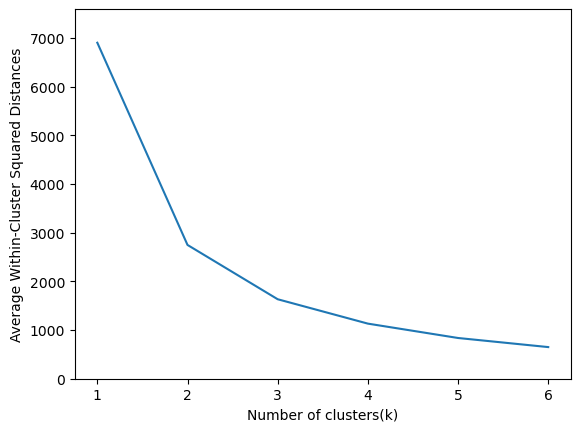

In [404]:
# Elbow curve to find the best number of clusters
inertia = []
for n_clusters in range(1, 7):
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(diabetes_df_norm)
    inertia.append(kmeans.inertia_ / n_clusters)
inertias = pd.DataFrame({'n_clusters': range(1, 7), 'inertia': inertia})
ax = inertias.plot(x='n_clusters', y='inertia')
plt.xlabel('Number of clusters(k)')
plt.ylabel('Average Within-Cluster Squared Distances')
plt.ylim((0, 1.1 * inertias.inertia.max()))
ax.legend().set_visible(False)
plt.show()

In [433]:
# Looking at the curve, we can see 3 or 4 clusters to be ideal. We will consider 3

In [434]:
Z = linkage(diabetes_df_norm, method='average') 

In [435]:
memb = fcluster(Z, 3, criterion='maxclust') #no more than 3 clusters

In [436]:
#Add the membership number, that is, the cluster number to the index
diabetes_df_norm.index = ['{}: {}'.format(cluster, state) for cluster, state in zip(memb, diabetes_df_norm.index)]

Means of Normalized Input Variables for Clusters with Average Linkage Method
   Pregnancies  Glucose  BloodPressure  SkinThickness    Insulin    BMI  \
1        0.004   -0.012          0.002         -0.021 -1.185e-02 -0.010   
2       -0.622    1.645         -0.406          1.945  2.261e+00  1.737   
3       -0.548    2.474         -0.199          7.945 -7.020e-15  0.326   

   DiabetesPedigreeFunction    Age  Outcome    Cluster  
1                    -0.029 -0.001   -0.006  Cluster 1  
2                     5.498 -0.403    0.841  Cluster 2  
3                     0.311  2.445    1.365  Cluster 3  


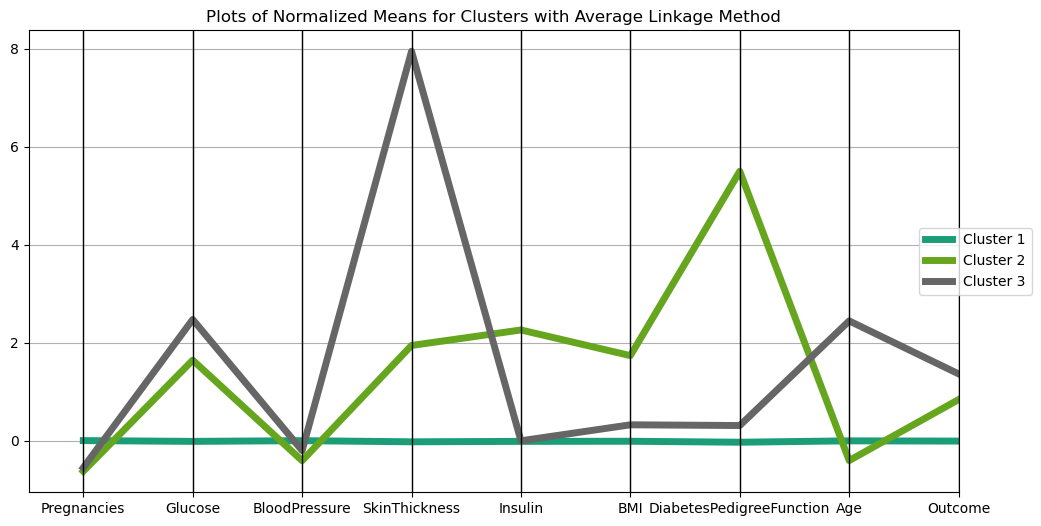

In [437]:
# Create data frame with means of each normalized input variable (measurement) for each cluster 
clust_mean_norm = diabetes_df_norm.groupby(memb).mean()

# Add cluster titles (Cluster 1, Cluster 2, ...) to cluster_mean data frame with means and precision of 3 decimals. 
clust_mean_norm['Cluster'] = ['Cluster {}'.format(i) for i in clust_mean_norm.index]
pd.set_option('display.precision', 3)

# Display the data frame with normalized mean values and cluster titles.
print('Means of Normalized Input Variables for Clusters with Average Linkage Method')
print(clust_mean_norm)

# Display profile plots of normalized means of each input variable for each cluster
plt.figure(figsize=(12,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(clust_mean_norm, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,8)
plt.title('Plots of Normalized Means for Clusters with Average Linkage Method')
plt.show()

In [438]:
diab_df = diabetes_df.copy()
diab_df['Cluster'] = memb
diabetes_pct = diab_df.groupby('Cluster')['Outcome'].mean() * 100
print(diabetes_pct)

Cluster
1     34.6
2     75.0
3    100.0
Name: Outcome, dtype: float64


# 11. K-means Clustering

In [411]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(diabetes_df_norm)

# Cluster membership
memb = pd.Series(kmeans.labels_, index=diabetes_df_norm.index)

In [412]:
kmeans.inertia_

4898.590984437231

In [413]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=diabetes_df_norm.columns)

#Add 'Cluster number' column
centroids['Cluster'] = ['Cluster {}'.format(i) for i in centroids.index]
pd.set_option('display.precision', 3)
print(centroids)
#pd.set_option('display.precision', 3)

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  \
0       -0.459   -0.527         -0.388         -0.394   -0.322 -0.416   
1        1.064    0.342          0.456          0.097    0.073  0.029   
2       -0.544    0.765          0.239          0.822    0.681  0.983   

   DiabetesPedigreeFunction    Age  Outcome    Cluster  
0                    -0.210 -0.573   -0.637  Cluster 0  
1                    -0.040  1.066    0.474  Cluster 1  
2                     0.583 -0.266    0.827  Cluster 2  


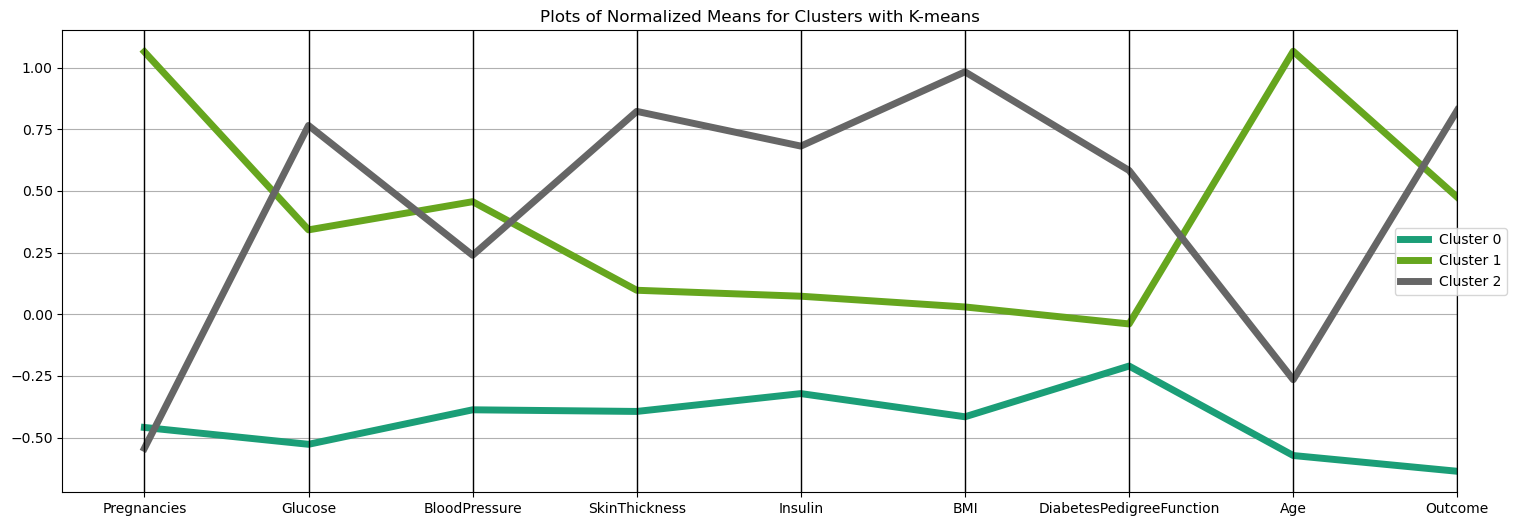

In [414]:
#Plot the means from kMeans clustering
plt.figure(figsize=(18,6))
fig.subplots_adjust(right=3)
ax = parallel_coordinates(centroids, class_column='Cluster', 
                          colormap='Dark2', linewidth=5)
plt.legend(loc='center left', bbox_to_anchor=(0.95, 0.5))
plt.xlim(-0.5,8)
plt.title('Plots of Normalized Means for Clusters with K-means')
plt.show()

In [415]:
# Checking for which clusters identify diabetic patients more or 
# which group of people tend to be at higher risk of diabetes

In [416]:
diabetic_pct = []
for i in range(3):
    cluster = diabetes_df[kmeans.labels_ == i]
    diabetic_pct.append(cluster["Outcome"].sum() / len(cluster)*100)

In [426]:
for i, item in enumerate(diabetic_pct):
    print(f"Cluster {i}: {round(item, 2)}"+"%")

Cluster 0: 4.52%
Cluster 1: 57.5%
Cluster 2: 74.34%


In [427]:
# The above percentages show that clusters 1 and 2 are at quite high risk of diabetes